En este ejemplo vamos suponemos que nuestra función etiquetadora f etiqueta según una regla x^3-x-5. Vamos a suponer que tenemos un muestreo tomado en 
[-1,1] que tiene algo de ruido. Vamos a intentar construir un modelo con el menor error  (MSE) posible.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


In [ ]:
x_values = np.random.uniform(low=-1, high=1, size=50)
noise =  np.random.uniform(low=-0.1, high=0.1, size=50)
f = lambda x: x**3-x-5
y_values =  np.apply_along_axis(f, 0,x_values)

In [ ]:
y_values_with_noise =y_values+noise

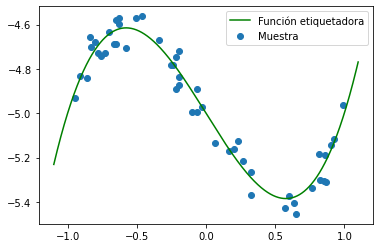

In [ ]:
plt.scatter(x_values, y_values_with_noise, label = 'Muestra')
x = np.linspace(-1.1, 1.1, 50000)
plt.plot(x, f(x), color='green', label = 'Función etiquetadora')
plt.legend()

Probamos con regresión lineal

In [ ]:
# Creamos el objeto de Regresión Linear
X = np.reshape(x_values, (-1, 1))
y = np.reshape(y_values_with_noise, (-1, 1))
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)

print(f'MSE {mean_squared_error(y, y_pred)}')
print("Coeficiente de la regresión: \n", regr.coef_)
print("Termino independiente: \n",  regr.intercept_)

MSE 0.021624244463633615
Coeficiente de la regresión: 
 [[-0.37687542]]
Termino independiente: 
 [-4.97486972]


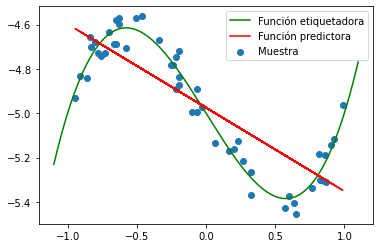

In [ ]:

plt.scatter(x_values, y_values_with_noise,label = 'Muestra')
x = np.linspace(-1.1, 1.1, 50000)
plt.plot(x, f(x), color='green',label = 'Función etiquetadora')
plt.plot(X, y_pred, color='red', label = 'Función predictora')
plt.legend()
plt.savefig('underfitting.jpeg')

Tenemos un error alto, y vemos claramente que nuestro modelo no se ajusta a los datos, probemos con regresión polinomial.

In [ ]:
for i in range(1,13):

  model = np.polyfit(X.flatten('F'), y.flatten('F'),i)
  p = np.poly1d(model)
  y_pred = p(X)
  y_pred
  print(f'El MSE para el modelo de regresion polinomial de grado {i} es {mean_squared_error(y, y_pred)}')

El MSE para el modelo de regresion polinomial de grado 1 es 0.02162424446363362
El MSE para el modelo de regresion polinomial de grado 2 es 0.021555466480918536
El MSE para el modelo de regresion polinomial de grado 3 es 0.003086051463908741
El MSE para el modelo de regresion polinomial de grado 4 es 0.00304994853486002
El MSE para el modelo de regresion polinomial de grado 5 es 0.002978957487806687
El MSE para el modelo de regresion polinomial de grado 6 es 0.0029359633803833734
El MSE para el modelo de regresion polinomial de grado 7 es 0.002930267236747824
El MSE para el modelo de regresion polinomial de grado 8 es 0.002784960577836837
El MSE para el modelo de regresion polinomial de grado 9 es 0.0026002046725464496
El MSE para el modelo de regresion polinomial de grado 10 es 0.0026002022635825484
El MSE para el modelo de regresion polinomial de grado 11 es 0.0025848401946038293
El MSE para el modelo de regresion polinomial de grado 12 es 0.0025829288816594884


Vemos que el error va disminuyendo conforme aumentamos el grado del polinomio, vamos a comparar nuestra función etiquetadora con nuestra función predictora (regresión polinomial de grado 8)

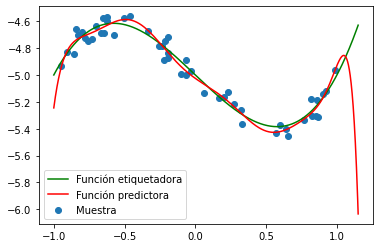

In [ ]:

model_8 = np.polyfit(X.flatten('F'), y.flatten('F'),12)
p_8 = np.poly1d(model_8)
x = np.linspace(-1, 1.15, 50000)
plt.plot(x, f(x), color='green',label = 'Función etiquetadora')
plt.plot(x, p_8(x), color='red',label = 'Función predictora')
plt.scatter(X, y,label = 'Muestra')
plt.legend()
plt.savefig('overfitting.jpeg')
plt.show()


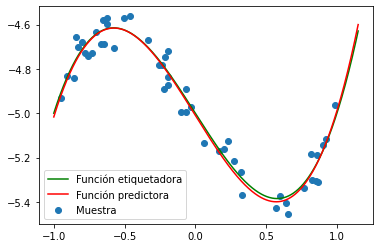

El MSE para el modelo de regresion polinomial de grado 3 es 0.021624244463633615


In [ ]:

model_8 = np.polyfit(X.flatten('F'), y.flatten('F'),3)
p_8 = np.poly1d(model_8)
x = np.linspace(-1, 1.15, 50000)
plt.plot(x, f(x), color='green',label = 'Función etiquetadora')
plt.plot(x, p_8(x), color='red',label = 'Función predictora')
plt.scatter(X, y,label = 'Muestra')
plt.legend()
plt.savefig('greatfit.jpeg')
plt.show()
print(f'El MSE para el modelo de regresion polinomial de grado 3 es {mean_squared_error(y, y_pred)}')

Aunque tenemos un error mayor que en el modelo polinomial de grado 8, es claro que nuestra función predictora es mucho más parecida a la función etiquetadora que la función predictora del modelo polinomial de grado 8

#Regresion lineal


In [ ]:
x_values = np.random.uniform(low=-1, high=1, size=100)
noise =  np.random.uniform(low=-.25, high=.25, size=100)
f = lambda x: 1/3*x+1
y_values =  np.apply_along_axis(f, 0,x_values)
y_values_with_noise =y_values+noise


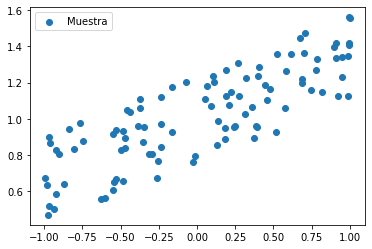

In [ ]:
plt.scatter(x_values, y_values_with_noise, label = 'Muestra')
x = np.linspace(-1.1, 1.1, 50000)
plt.legend()
plt.savefig('linear_data.png')

In [ ]:
X = np.reshape(x_values, (-1, 1))
y = np.reshape(y_values_with_noise, (-1, 1))
regr = linear_model.LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)


print(f'MSE {mean_squared_error(y, y_pred)}')
print("Coeficiente de la regresión: \n", regr.coef_)
print("Termino independiente: \n",  regr.intercept_)

MSE 0.021542996961376362
Coeficiente de la regresión: 
 [[0.34419426]]
Termino independiente: 
 [1.01226639]


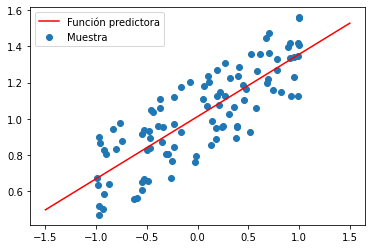

In [ ]:
x = np.linspace(-1.5, 1.5, 50000)
plt.scatter(x_values, y_values_with_noise,label = 'Muestra')
h = lambda x: regr.coef_*x +regr.intercept_
y = np.apply_along_axis(h, 0,x)
plt.plot(x, y[0], color='red', label = 'Función predictora')
plt.legend()
plt.savefig('linear_regresion.png')

# Regresión polinomial

In [ ]:
x_values = np.random.uniform(low=-1, high=1, size=100)
noise =  np.random.uniform(low=-.4, high=.4, size=100)
f = lambda x:x**2
y_values =  np.apply_along_axis(f, 0,x_values)
y_values_with_noise =y_values+noise


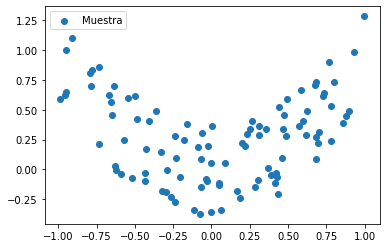

In [ ]:
plt.scatter(x_values, y_values_with_noise, label = 'Muestra')
x = np.linspace(-1.1, 1.1, 50000)
plt.legend()

plt.savefig('cuadratic_data.png')
plt.show()

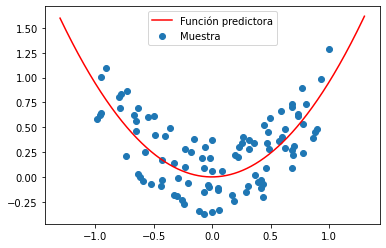

In [ ]:

model = np.polyfit(x_values.flatten('F'), y_values_with_noise.flatten('F'),2)
p = np.poly1d(model)
x = np.linspace(-1.3, 1.3, 50000)
plt.plot(x, p(x), color='red',label = 'Función predictora')
plt.scatter(x_values, y_values_with_noise,label = 'Muestra')
plt.legend()
plt.savefig('cuadratic_regresion.png')
plt.show()